# Diabetic Patient Prediction

In [23]:
# to balance the dataset for the targets (1's & 0's)

!pip install -U imbalanced-learn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 660.6 kB/s eta 0:00:01
   ------------- ------------------------- 81.9/235.6 kB 919.0 kB/s eta 0:00:01
   ---------------------------------- ----- 204.8/235.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.3 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### reviewing each feature against the targets in histogram format

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df[df['Outcome']==1]

# showing dataframe for all diabetic patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [6]:
df[df['Outcome']==0] # non-diabetic patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


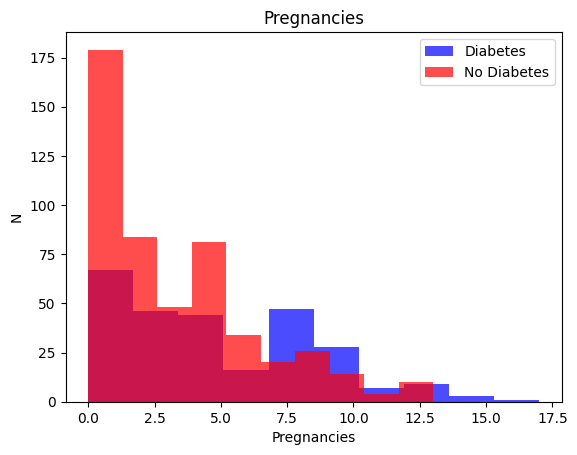

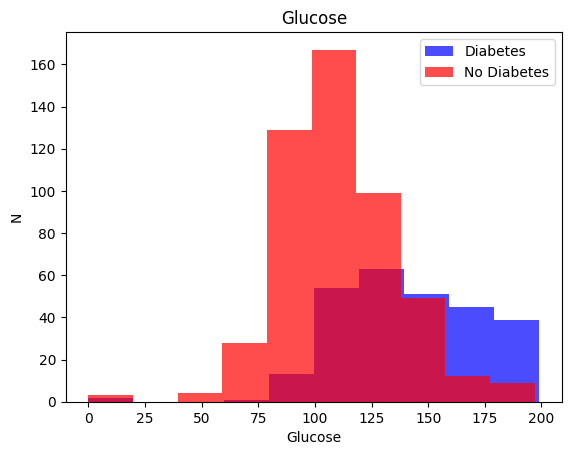

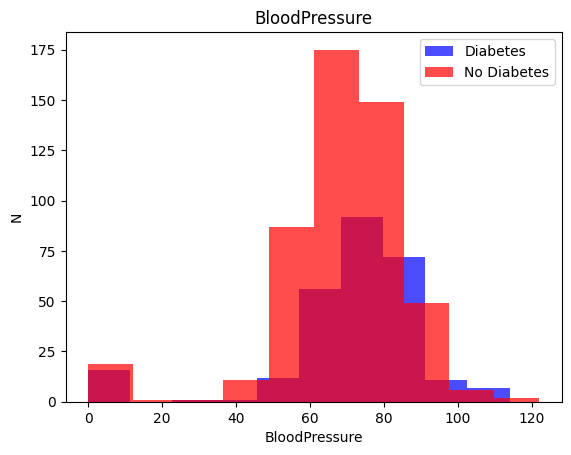

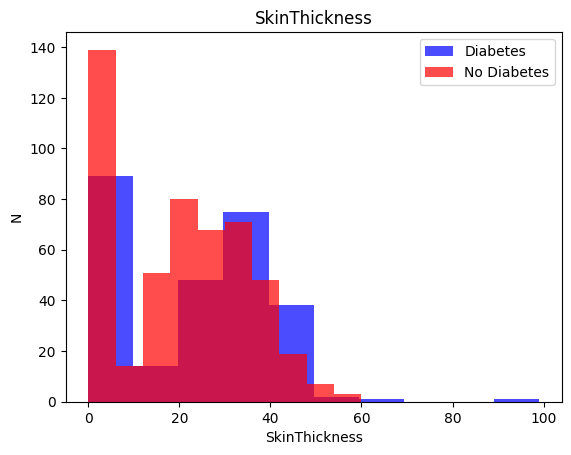

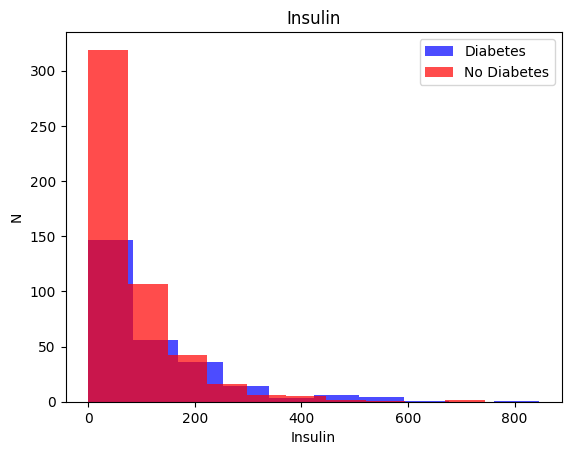

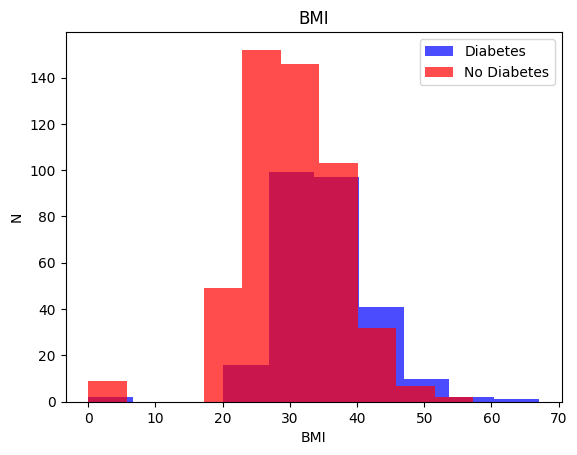

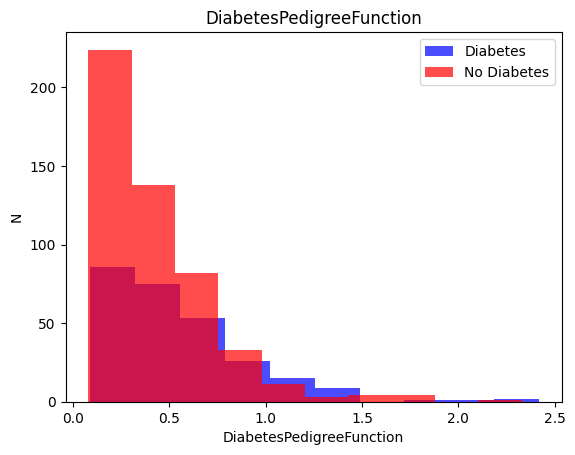

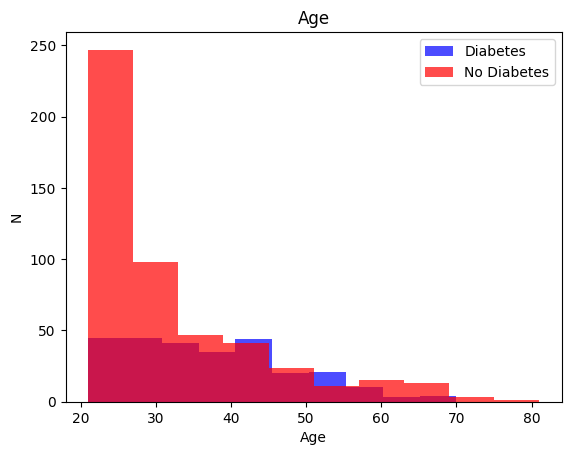

In [7]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7)
    plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7)
    plt.title(label)
    plt.ylabel('N')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [8]:
print('No of Non-diabetic Patients: ', len(df[df['Outcome']==0])), 
print('No of Diabetic Patients: ', len(df[df['Outcome']==1]))

No of Non-diabetic Patients:  500
No of Diabetic Patients:  268


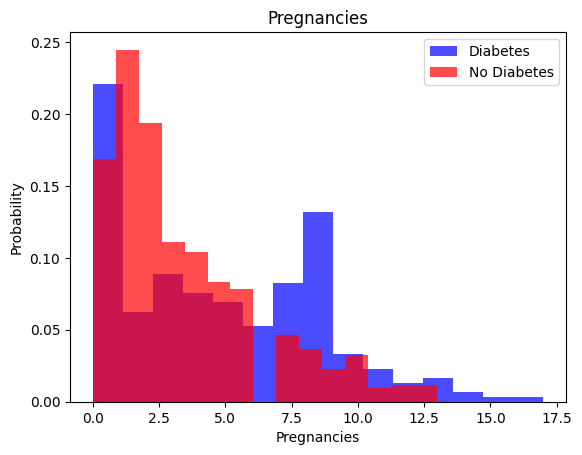

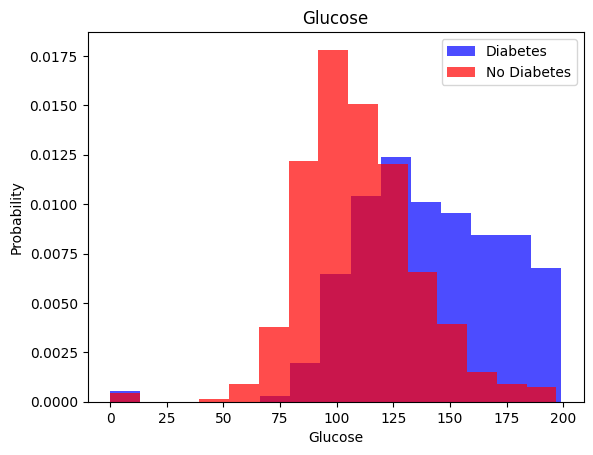

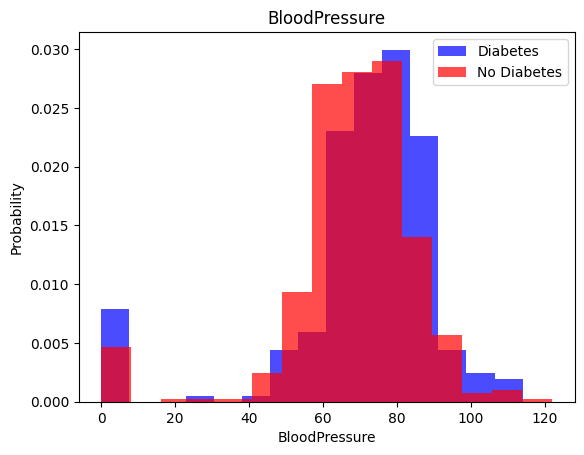

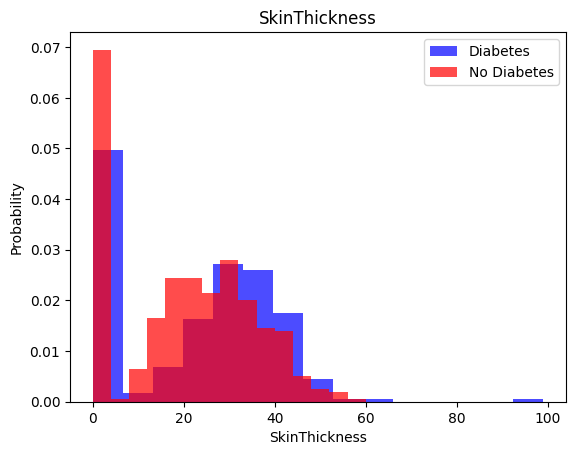

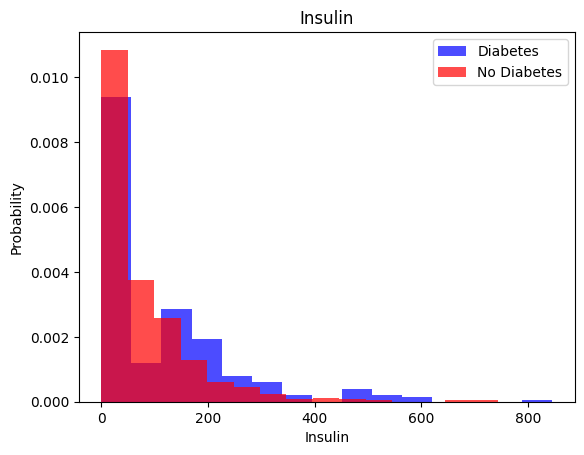

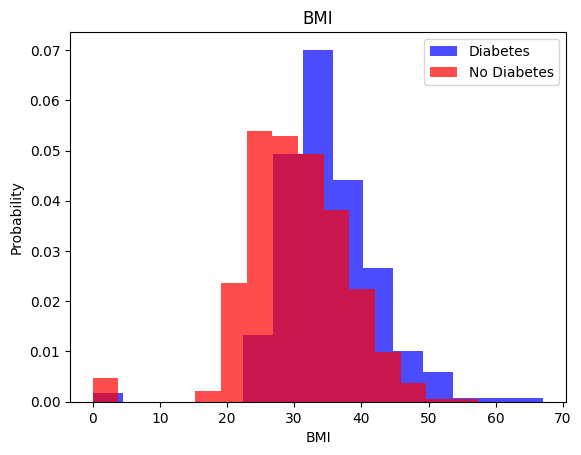

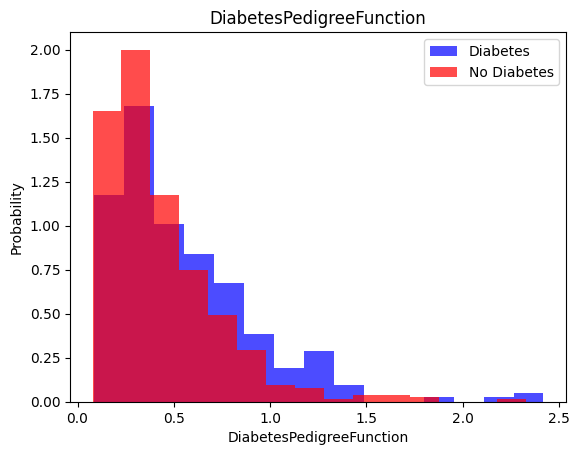

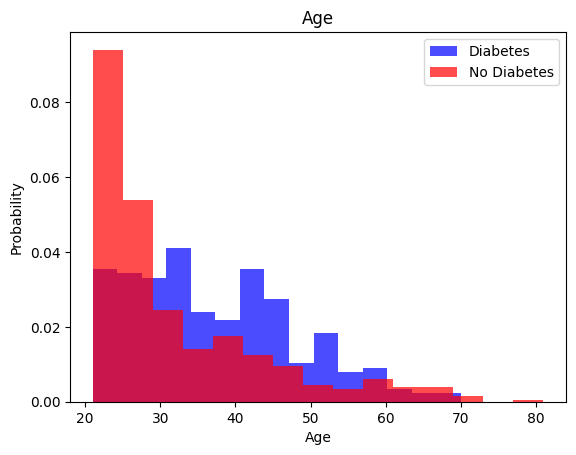

In [9]:
# given the disparity in representation for both categories, normalization is applied.
# with this, ratios per columns would be compared as opposed to nominal values:

for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [10]:
# splitting into features and targets arrays:

x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# scaling the features:

scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [13]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

In [14]:
from imblearn.over_sampling import RandomOverSampler

# to balance the dataset

In [15]:
over = RandomOverSampler()
x, y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [16]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [17]:
# train:60%, validation:20%, test:20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.6, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

#### building the model

In [18]:
# build the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, if x > 0 --> x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # for binary classification purposes
])

In [19]:
# compile the model

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.BinaryCrossentropy(), # used here since its binary classification
    metrics=['accuracy']
)

In [20]:
# assessing model performance on training and validation data:

model.evaluate(x_train, y_train)

13/13 [==============================] - 1s 1ms/step - loss: 0.8171 - accuracy: 0.5075


[0.8170763254165649, 0.5074999928474426]

In [21]:
model.evaluate(x_valid, y_valid)

10/10 [==============================] - 0s 1ms/step - loss: 0.7663 - accuracy: 0.5633


[0.7663410902023315, 0.5633333325386047]

In [22]:
# fit the model
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
25/25 [==============================] - 1s 7ms/step - loss: 0.7643 - accuracy: 0.5200 - val_loss: 0.6937 - val_accuracy: 0.5967
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.5825 - val_loss: 0.6548 - val_accuracy: 0.6333
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6725 - val_loss: 0.6256 - val_accuracy: 0.7200
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.7300 - val_loss: 0.5952 - val_accuracy: 0.7333
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.7400 - val_loss: 0.5696 - val_accuracy: 0.7467
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7525 - val_loss: 0.5481 - val_accuracy: 0.7600
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5375 - accuracy: 0.7525 - val_loss: 0.5323 - val_accuracy: 0.7500
Epoch 8/20
25/25 [==

In [23]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7733


[0.4363616406917572, 0.7733333110809326]